<h2><center>Trabalho de conclusão do curso de Especialização em Ciência de Dados da Facens</center></h2>
<h3><center>Faculdade de Engenharia de Sorocaba</center></h3>

**Alunos:** 
<p>
<p>Dani Shizue Sakamoto - RA: 191219
<p>Mariana de Castro Pires Tavares Albuquerque - RA: 191224
<p>Tan Kim Wah - RA: 141462

<h2><center>Classificação de Idade em Imagens</center></h2>

Análise efetuada a partir do dataset "Adience", disponível em "Unfiltered Faces for Age and Gender Classification" https://talhassner.github.io/home/projects/Adience/Adience-data.html#agegender.

**Introdução**

Buscamos um dataset que contivesse imagens de rostos, para que conseguíssemos efetuar a classificação dos sujeitos em diversas faixas etárias.
Pensamos que referida classificação pode ser útil em inúmeras situações, tais como a identificação de menores desacompanhados em locais públicos, como por exemplo aeroportos e rodoviárias. Desse modo, nos propusemos a dividir os dados em duas (adultos e crianças) ou três (adultos, crianças e adolescentes) categorias.

<img src="https://drive.google.com/uc?id=1mwT7ZBCVhAk_g5OHPt5A8U_a1-1zvKFY" width = 200>

<img src="https://drive.google.com/uc?id=1Iwl3nLE_f5-ZDS4by-vB--VXJ5MVbwS9" width = 200>

<img src="https://drive.google.com/uc?id=1BGNW-LYS7IXlaSnJVyZsqjs6fFBO_lDc" width = 200>

<img src="https://drive.google.com/uc?id=1Y-oM-u--9lY441GP6GYhE9zYJ3KMukIh" width = 200>



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")

In [ ]:
df = pd.read_excel( 'Dados-imagens.xlsx', sheet_name= 'Planilha1')

In [ ]:
df.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


In [ ]:
df.describe()

,face_id,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
count,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000
mean,1023.858906,949.670212,675.659370,633.042437,629.692463,-12.405111,3.128549,72.266598
std,645.385251,667.060150,429.918002,440.409036,426.296233,73.430214,15.658667,38.799247
min,1.000000,0.000000,0.000000,80.000000,80.000000,-205.000000,-45.000000,5.000000
25%,486.000000,441.250000,333.000000,324.000000,325.000000,-80.000000,0.000000,42.000000
50%,980.000000,852.000000,653.000000,517.000000,517.000000,-5.000000,0.000000,70.000000
75%,1526.000000,1359.000000,964.000000,778.000000,778.000000,5.000000,0.000000,98.000000
max,2284.000000,10024.000000,2752.000000,3264.000000,3225.000000,365.000000,45.000000,221.000000


In [ ]:
print(df['age'].value_counts().head(8))
print(df['gender'].value_counts())

(25, 32)     5004
(0, 2)       2488
(38, 43)     2293
(4, 6)       2140
(8, 12)      2124
(15, 20)     1642
(60, 100)     872
(48, 53)      830
Name: age, dtype: int64
f    9372
m    8120
u    1099
Name: gender, dtype: int64


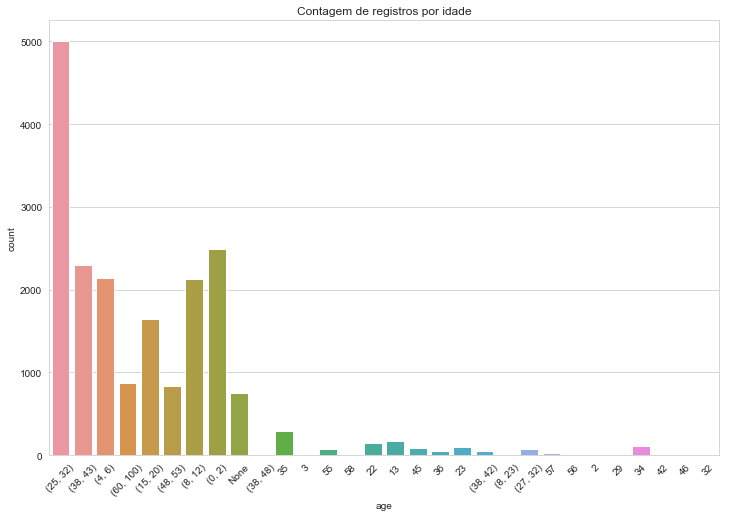

In [ ]:
plt.figure(figsize= (12, 8))
g = sns.countplot(x = 'age', data = df)
g.set_title(label = 'Contagem de registros por idade')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

**Análise da variável idade**
Observamos que a variável em questão está desbalanceada, pois grande parte dos registros (5004 - aproximadamente 26%) se concentra na faixa de 25 a 32 anos, seguida por (0, 2) - 2488, (38, 43) - 2293, (4, 6) - 2140, (8, 12) - 2124 e (15, 20) - 1642. Todos os demais grupos possuem menos de 1000 registros cada, sendo que há intervalos etários (3, 7, 13 - 14, 21 - 24, 33 - 37, 44 - 47, 54 - 59) para os quais não há faixa etária correspondente.

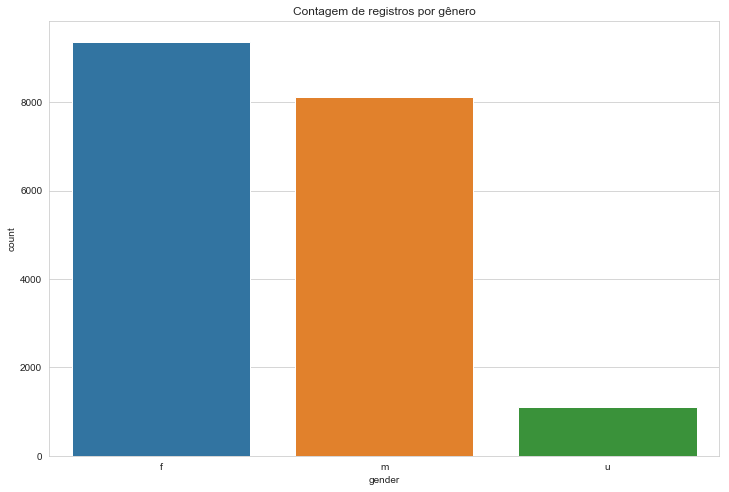

In [ ]:
plt.figure(figsize= (12, 8))
g = sns.countplot(x = 'gender', data = df)
g.set_title(label = 'Contagem de registros por gênero')
g.set_xticklabels(g.get_xticklabels())
plt.show()

**Análise da variável gênero** 
Verificamos que 48,4% correspondem ao gênero feminino, 41,9% ao masculino e 5,7% possuem gênero não identificado.

In [ ]:
df_filtered = df.groupby('age')['age'].filter(lambda x: len(x) >= 1000)
df_filtered = df[df['age'].isin(df_filtered)]
df_filtered['age'].value_counts()

(25, 32)    5004
(0, 2)      2488
(38, 43)    2293
(4, 6)      2140
(8, 12)     2124
(15, 20)    1642
Name: age, dtype: int64

<Figure size 1080x576 with 0 Axes>

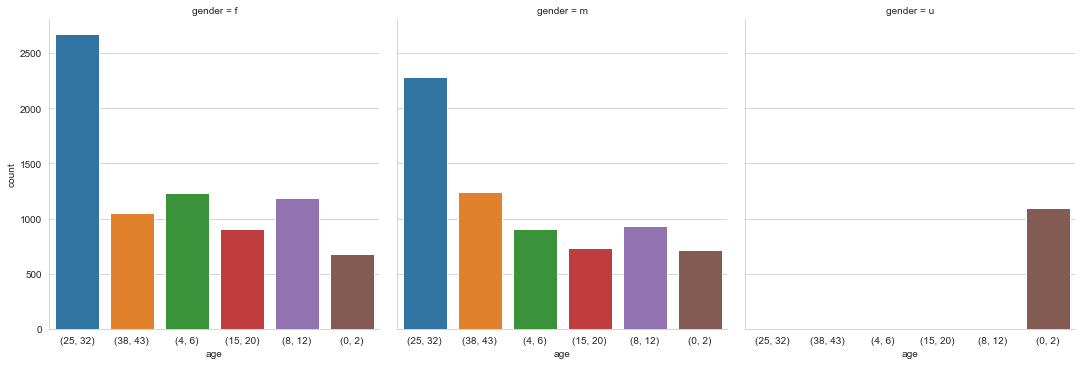

In [ ]:
plt.figure(figsize = (15, 8))
g = sns.catplot(x="age", col="gender",
                data=df_filtered, kind="count")

**Distribuição de idade por gênero**
Verificamos que, considerando apenas as faixas etárias com frequência superior a 1000, a distribuição de idade entre os gêneros feminino e masculino não está muito discrepante, e destacamos que os sujeitos de gênero não identificado são todos bebês (0 a 2 anos).

**Destaques da pré-análise:**

Tendo em vista potenciais questões relacionadas a preconceito de gênero, o que inclusive motivou o google a excluir a identificação de gênero de sua inteligência artifical (https://www.tecmundo.com.br/software/150634-ia-google-nao-determinara-genero-fotos-pessoas.htm), bem como o fato de não vislumbrarmos uma potencial aplicação prática interessante da identificação de gênero nas imagens analisadas, nos ativemos à classificação em faixas etárias. Trabalhamos, então, com duas possibilidades: classificação entre adultos (acima de 15 anos) e crianças (até 14 anos) e classificação entre adultos (acima de 21 anos), crianças (até 12 anos) e adolescentes (entre 13 e 20 anos).

In [ ]:
print(df['age'].unique())

['(25, 32)' '(38, 43)' '(4, 6)' '(60, 100)' '(15, 20)' '(48, 53)'
 '(8, 12)' '(0, 2)' 'None' '(38, 48)' 35 3 55 58 22 13 45 36 23 '(38, 42)'
 '(8, 23)' '(27, 32)' 57 56 2 29 34 42 46 32]


In [ ]:
#Mapeamento das classes originais para as classes eleitas na análise
mapper_3_classes = {'(25, 32)':2, '(38, 43)':2, '(4, 6)':0, '(60, 100)':2, '(15, 20)':1,
       '(48, 53)':2, '(8, 12)':0, '(0, 2)':0, '(38, 48)':2, '35':2, '3':0, '55':2, '58':2,
       '22':2, '13':1, '45':2, '36':2, '(38, 42)': 2, '(8, 23)': 1, '(27, 32)': 2, '57': 2,
        '56': 2, '2': 0,  '29': 2, '34': 2, '42': 2, '46': 2, '32': 2}

In [ ]:
mapper_2_classes = {'(25, 32)':1, '(38, 43)':1, '(4, 6)':0, '(60, 100)':1, '(15, 20)':1,
       '(48, 53)':1, '(8, 12)':0, '(0, 2)':0, '(38, 48)':1, '35':1, '3':0, '55':1, '58':1,
       '22':1, '13':0, '45':1, '36':1, '(38, 42)': 1, '(8, 23)': 0, '(27, 32)': 1, '57': 1,
        '56': 1, '2': 0,  '29': 1, '34': 1, '42': 1, '46': 1, '32': 1}

In [ ]:
df['2 classes'] = df['age'].map(mapper_2_classes)
df['3 classes'] = df['age'].map(mapper_3_classes)

**Distribuição das Faixas Etárias em 2 Classes**

In [ ]:
df['2 classes'].value_counts() #tabela de frequências

1.0    10770
0.0     6753
Name: 2 classes, dtype: int64

<Figure size 1080x576 with 0 Axes>

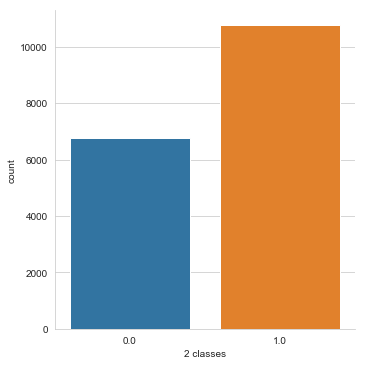

In [ ]:
plt.figure(figsize = (15, 8))
g = sns.catplot(x="2 classes",
                data=df, kind="count") #0 - crianças e 1- adultos

Verificamos que a divisão em 2 classes apenas, entre adultos (1) e crianças (0) revela que há mais adultos que crianças, conforme tabela de frequência e gráfico acima.

**Distribuição das faixas etárias em 3 classes**

In [ ]:
df['3 classes'].value_counts() #tabela de frequência

2.0    9128
0.0    6752
1.0    1643
Name: 3 classes, dtype: int64

<Figure size 1080x576 with 0 Axes>

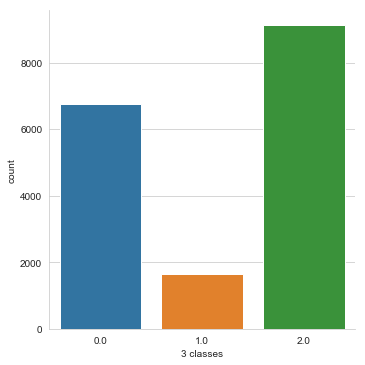

In [ ]:
plt.figure(figsize = (15, 8))
g = sns.catplot(x="3 classes",
                data=df, kind="count") #0 - crianças, 1- adolescentes e 2-adultos

A análise do dataset dividido em três classes demonstra que o mesmo está desbalanceado, haja vista a pequena quantidade de adolescentes, equivalente a menos de 10% das imagens (9,37%). Além disso, trata-se ainda da classe cuja identificação é mais complicada, haja vista potenciais semelhanças, tanto com as crianças quanto com os adultos. Isso pode ser notado em Eidinger, Enbar e Hassner (2014), cuja classificação por faixas etárias, nas faixas de 8-13 e 15-20 obteve acertos (acurácia) de, respectivamente,  0.552 e 0.239.

**Referências**

<p>

<p>Tal Hassner, Shai Harel, Eran Paz and Roee Enbar, Effective Face Frontalization in Unconstrained Images, IEEE Conf. on Computer Vision and Pattern Recognition (CVPR), Boston, June 2015.
    Disponível em: https://ieeexplore.ieee.org/document/7301352, acesso em 29/09/2020.

<p> Gil Levi and Tal Hassner, Age and Gender Classification Using Convolutional Neural Networks, IEEE Workshop on Analysis and Modeling of Faces and Gestures (AMFG), at the IEEE Conf. on Computer Vision and Pattern Recognition (CVPR), Boston, June 2015.
    Disponível em: https://talhassner.github.io/home/projects/frontalize/CVPR2015_frontalize.pdf, acesso em 29/09/2020.

<p>Eran Eidinger, Roee Enbar, and Tal Hassner, Age and Gender Estimation of Unfiltered Faces, Transactions on Information Forensics and Security (IEEE-TIFS), special issue on Facial Biometrics in the Wild, Volume 9, Issue 12, pages 2170 - 2179, Dec. 2014.
    Disponível em: https://talhassner.github.io/home/projects/cnn_agegender/CVPR2015_CNN_AgeGenderEstimation.pdf, acesso em 29/09/2020.